# Iris Data Set
Basic Exploration in Classification

In [36]:
# import basic libraries

import pandas as pd #for dataframes
import numpy as np #for math/statistics

#for graphs, visuals, etc. 
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [37]:
# import data set from preloaded sklearn datasets

#use this to import the preloaded iris datasets (https://scikit-learn.org/stable/datasets/index.html#toy-datasets)
from sklearn.datasets import load_iris

#save data information as variable
iris = load_iris()

In [38]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [39]:
iris
#data initially comes as dictionary with array of lists, split between 'data' and 'target' values

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### If we want to view the data more easily we can view in a dataframe by using Pandas
to access only the data, use iris.data

In [40]:
# make sure to save as a variable so the dataframe can be accessed again later
import pandas as pd
data = pd.DataFrame(iris.data)

In [41]:
data.head()
# use .head() to show only the first 5 rows of the data
# this will give you a quick overview of the data, save your computer time/memory, and give a clean result
# if you want to show a specific number of rows, you can input any number in the bracket and it will give those many rows (.head(20) will show the first 20 rows)



,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### The data is not already labeled, so we can reference the sklearn website for further information about the data and features.

in the documentation the data features are listed as: 
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

### What do these features refer to?
- Sepal is the green part around the flower petals that enclose the flower when the flower is not in bloom. This is measured by length and width in centimeters as a feature for predicting what type of iris it is. 
- The length and width of the petals, or the colorful leaves of the flower, are also measured in centimeters.

### Lets rename the columns with these features so we know what the variables are referring to when we model the data later.

In [42]:
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [43]:
data.head()
#now the data is in a dataframe where we can easily see what each of the numbers is referring to

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Incorporating the target variable data
In the same way as we did with the 'data' of the data set, we can view just the target variable (which class the flower belongs to) by using iris.target

In [44]:
target = pd.DataFrame(iris.target)

In [45]:
target.head()

,0
0,0
1,0
2,0
3,0
4,0


In [46]:
#Lets rename the column so that we know that these values refer to the target values
target = target.rename(columns = {0: 'target'})
target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [47]:
target.target.unique()

array([0, 1, 2])

### What do these numbers refer to in the target column?
#### 0 = Iris Setosa
#### 1 = Iris Versicolour
#### 2 = Iris Virginica

In this classification project we will be using the length and widths of the flower's sepal and petals to predict which of these three types of iris the flower is. If our model works well, we will be able to apply it to unseen data -- allowing us to predict the type of flower without knowing its true class. 

### For the purpose of understanding our data better, lets combine the data and target dataframes together
This will allow us to see how the features line up with the class determinations

In [48]:
#combine the data and target dataframes
#axis = 1 tells the dataframe to add the target dataframe as another column of the data dataframe, axis = 0 would add the values as another row on the bottom
df = pd.concat([data, target], axis = 1)

In [49]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## EDA / Data Cleaning
It's super important to look through your data, make sure it is clean, and begin to explore relationships between features and target variables. Since this is a relatively simple data set there is not much cleaning that needs to be done. But it is important to still go through these steps everytime. 

In [50]:
#see what type of data you have
df.dtypes

#float = numbers with decimals
#int = integer or whole number without decimals
#obj = string, or words 
#the 64 after these data types refers to how many bits of storage the value occupies. You will often seen 32 or 64

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [51]:
#check for missing values (nothing missing)
#if there were missing values you would have to either delete rows of data that had missing values, or there are several options of how you could fill that missing number (with the column's mean, previous value...)
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [52]:
# general statistical overview of the data columns
# this is also a good way to check your data for extreme outliers if the min/max seems extremely far from the mean, you can investigate the data further
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


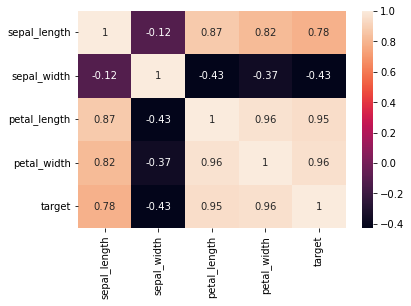

In [53]:
#check correlations by using heatmap
sns.heatmap(df.corr(), annot = True);

Petal length and width is most correlated with the target, meaning that they are good features to take into consideration when deciding which class the flower is. Sepal width is most anti correlated, indicating that it does not have a strong relationship with deciding which class the flower is. 

There is also some intercorrelation amonth the sepal and petal features. 

#### Visualize the relationship between sepal width and length in relation to the different classes of iris on a scatterplot

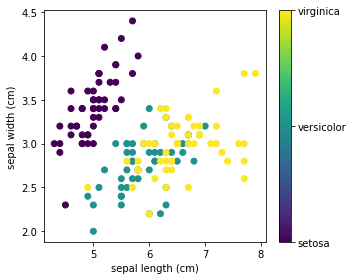

In [54]:
# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

#### Visualize the relationship between petal length and width on a scatterplot

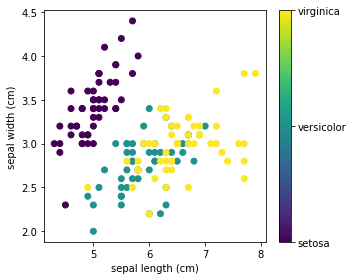

In [71]:
x_index = 2
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

# Modelling

In [56]:
#now that the data has been cleaned & explored, we can split the dataframe back into X (data) and y (target)

X = df.copy()
y = X.pop('target')

#### Split into train and test data
80% of the data will be the training data, and 20% will be the test data to evaluate our model

by stratifying on y we assure that the different classes are represented proportionally to the amount in the total data (this makes sure that all of class 1 is not in the test group only)


In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify = y)

In [58]:
# here we can see how the data is split into the different groups
print('X train', X_train.shape)
print('y train', y_train.shape)
print('X test', X_test.shape)
print('y test', y_test.shape)

X train (120, 4)
y train (120,)
X test (30, 4)
y test (30,)


#### Standardize X values
This puts the X values on a standard scale for all features, while keeping the scale of differences between the values.



In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#### Find baseline prediction
The baseline is the probability of predicting class before the model is implimented. If the data is split into 2 classes evenly, there is already a 50% chance of randomly assigning an element to the correct class. The goal of our model is to improve on this baseline, or random prediction. Also, if there is a strong class imbalance (if 90% of the data was in class 1), then we would need to adjust the threshold for our model.

In [60]:
df.target.value_counts(normalize= True)
#the baseline for this model is 1/3, meaning that by chance you could randomly predict the correct class of an element 1 out of every 3 times

0    0.333333
1    0.333333
2    0.333333
Name: target, dtype: float64

#### Create the Logistic Regression Model
Logistic Regression is one of the most straight forward yet effective classification models, allowing binary or multiple class prediction. 

In [61]:
from sklearn.linear_model import LogisticRegression

#create the model instance
model = LogisticRegression()

#fit the model on the training data
model.fit(X_train, y_train)

#the score, or accuracy of the model
model.score(X_test, y_test)

0.9666666666666667

In [62]:
#the test score is already very high, but we can use the cross validated score to ensure the model's strength 
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=10)
print(np.mean(scores))

0.9499999999999998


#### Model Coefficients

In [63]:
df_coef = pd.DataFrame(model.coef_, columns=X_train.columns)
df_coef

,sepal_length,sepal_width,petal_length,petal_width
0,-1.102746,1.001818,-1.836891,-1.667978
1,0.402982,-0.323432,-0.277761,-0.650011
2,0.699764,-0.678386,2.114653,2.317989


In [64]:
model.coef_


array([[-1.10274625,  1.00181799, -1.83689142, -1.66797789],
       [ 0.40298238, -0.32343233, -0.2777613 , -0.6500109 ],
       [ 0.69976387, -0.67838566,  2.11465272,  2.31798879]])

#### Look at the predictions that the model made for the test data set

In [65]:
predictions = model.predict(X_test)
predictions

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1])

In [66]:
#compare predicted values with the actual scores
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
compare_df
#index 25 is the only time it incorrectly labeled the test data

,actual,predicted
0,2,2
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,2,2
7,2,2
8,2,2
9,1,1


In [67]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predictions, labels=[2, 1, 0]),
             index=[2, 1, 0], columns=[2, 1, 0])

,2,1,0
2,9,1,0
1,0,10,0
0,0,0,10


In the confusion matrix above the predicted values are the columns and the actual are the rows. It allows us to see where the model makes true and false predictions, and if it predicts incorrectly, we can see which class it is predicting falsely. 

We can see that class 0 and 1 were all predicted correctly all 10 times, but the model incorrectly labeled class 2 as class 1 in one instance

#### Classification Report
Another good way to check how your model is performing is by looking at the classification report. This shows you precision, recall, f1 scores, and the number of items in that class (support). If you want to have more false positives or more false negatives you can tune your model further to account for this. 

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



#### Predicted Probabilities
By using .predict_proba(X_test) we can look at the probabilities of each row of data belonging to one of the three classes. By default the model will assign the item to the class with the highest probability. If we wanted to adjust the accuracy or precision, we could do this by changing the threshold of how high the predicted probability would have to be before it was assigned to that class. In this case, there is not a consequence to misassigning a flower to another class, but models used to detect cancer cells adjust their models to 'assume the worst' and assign it as a true cancer cell more often. This is used in many cases when it is better to be over cautious than mislabel the cell as safe and healthy.

In [69]:
probs = model.predict_proba(X_test)
probs

array([[1.63186361e-05, 6.21815269e-02, 9.37802154e-01],
       [9.58818517e-01, 4.11809764e-02, 5.06079949e-07],
       [1.47033243e-01, 8.46368397e-01, 6.59835966e-03],
       [9.83032739e-01, 1.69669990e-02, 2.62377208e-07],
       [9.70334394e-01, 2.96634883e-02, 2.11809915e-06],
       [9.82231961e-01, 1.77678247e-02, 2.14627141e-07],
       [7.09670920e-04, 6.76980310e-02, 9.31592298e-01],
       [2.45272680e-04, 1.66636384e-01, 8.33118343e-01],
       [2.65269908e-03, 2.50849991e-01, 7.46497310e-01],
       [2.11858741e-03, 7.16489294e-01, 2.81392118e-01],
       [9.89698075e-01, 1.03017389e-02, 1.86425615e-07],
       [1.30365282e-02, 9.07045697e-01, 7.99177746e-02],
       [8.78086310e-05, 7.33418781e-02, 9.26570313e-01],
       [6.08252896e-03, 9.59410009e-01, 3.45074622e-02],
       [5.62901191e-04, 1.80096415e-01, 8.19340684e-01],
       [9.95668556e-01, 4.33136969e-03, 7.45330115e-08],
       [1.96714353e-05, 3.99576806e-02, 9.60022648e-01],
       [2.18169008e-02, 9.13124

In [70]:
#put the probabilities into a dataframe for easier viewing
Y_pp = pd.DataFrame(model.predict_proba(X_test), 
             columns=['class_0_pp', 'class_1_pp', 'class_2_pp'])
Y_pp.head()

,class_0_pp,class_1_pp,class_2_pp
0,0.000016,0.062182,9.378022e-01
1,0.958819,0.041181,5.060799e-07
2,0.147033,0.846368,6.598360e-03
3,0.983033,0.016967,2.623772e-07
4,0.970334,0.029663,2.118099e-06
